In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools

# 1. Random Numbers

### Home made linear congruental generator

##### A few conditions (outlined below) need to be satisfied for the period of the pseudo-random numbers to be the maximum possible for a given modulus.

In [2]:
seed = 1

x = [seed]

m = 13*13
# m-1 maximum random number
# [0,1] x/(m-1)
c = 7
a = 13 + 1

In [3]:
def rand_LCG(x):
    #Linear Congruental Generator
    return (a*x + c) % m

In [4]:
print(x)

[1]


In [5]:
rand_LCG(x[0])

21

In [6]:
for i in range(m+10):
    x.append(rand_LCG(x[-1]))

In [7]:
x[:10]

[1, 21, 132, 165, 120, 166, 134, 24, 5, 77]

In [8]:
x[-11:]

[1, 21, 132, 165, 120, 166, 134, 24, 5, 77, 71]

In [9]:
def plots(x):
    plt.hist(x,bins=99)
    plt.xlabel("x")
    plt.ylabel("pdf")
    plt.show()
    plt.plot(x, marker=".", lw=0)
    plt.xlabel("$i$")
    plt.ylabel("x$_i$")
    plt.show()
    plt.plot(x[:-1], x[1:], marker=".", lw=0)
    plt.xlabel("x$_i$")
    plt.ylabel("x$_{i+1}$")
    plt.show()

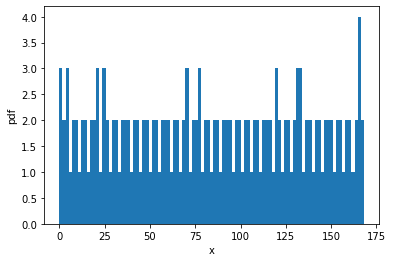

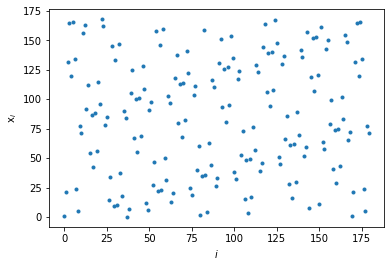

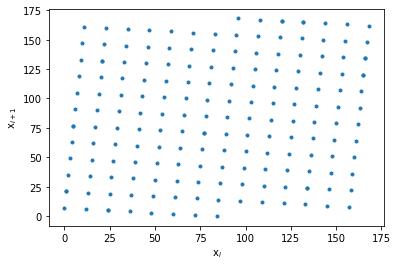

In [10]:
plots(x)

In [11]:
rng = np.random.default_rng(seed=1)
x = rng.random(100)

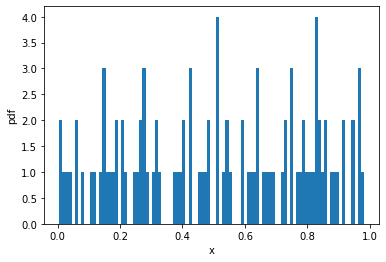

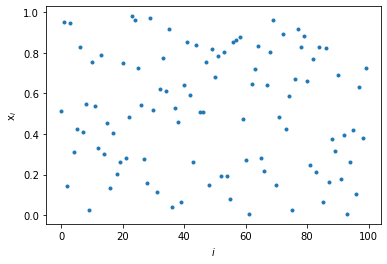

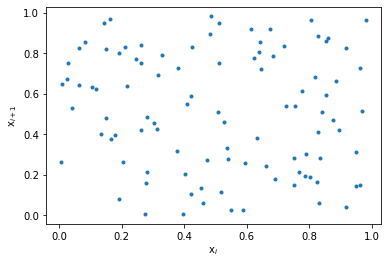

In [12]:
plots(x)

# 2. Monte Carlo sampling and integrals

$A_{square} = L^2$
$A_{circ} = \pi L^2/4$

## How many random points fall inside circumference
## and compute $\pi$ numerically

$\pi = 4 A_{circ}/A{square}\simeq 4 * N_{points, inside}/N_{points, total}$

Consider a square with $L=1$

In [14]:
# Imagine that you a square with side 1
# a quater of circumference inscripted in this square
N = np.array([1e0,1e1,1e2,1e3,1e4,1e5,1e6]) # Npoints_total
k = np.zeros([len(N)]) # Npoints_inside
for c in range(len(N)):
    for i in range(int(N[c])):
        x = rng.random()
        y = rng.random()
        if x**2 + y**2 <=1:
            k[c]+=1
        else:
            pass


In [15]:
pis = 4 * k /N

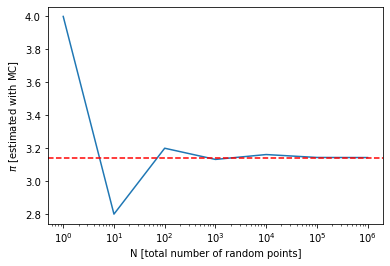

In [16]:
plt.plot(N, pis)

plt.xlabel('N [total number of random points]')
plt.ylabel(r'$\pi$ [estimated with MC]')

plt.axhline(np.pi, color = 'red', ls = '--', label= r'True $\pi$')

plt.xscale('log')

plt.show()

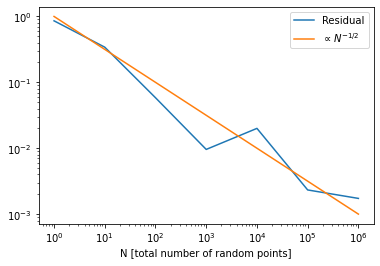

In [17]:
plt.plot(N, np.abs(pis - np.pi), label = 'Residual')

plt.plot(N, N**(-1/2), label = r'$\propto N^{-1/2}$')

plt.xlabel('N [total number of random points]')
#plt.ylabel(r'$\pi$ [estimated with MC]')

#plt.axhline(np.pi, color = 'red', ls = '--', label= r'True $\pi$')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [18]:
pis, np.pi

(array([4.      , 2.8     , 3.2     , 3.132   , 3.1616  , 3.14392 ,
        3.143324]),
 3.141592653589793)

# 3. Mean value integrals


### Estimate the value of $\pi$ using MC technique

In [19]:
def Integrate_MVM(f, a, b, N):
    N = int(N)
    if a>b:
        a,b = b,a
    xs = (b-a)*rng.random(N) + a
    ys = f(xs)
    mean_f = np.sum(ys)/N
    return (b-a) * mean_f

In [20]:
def f(x):
    return np.sin(x)**2/np.pi

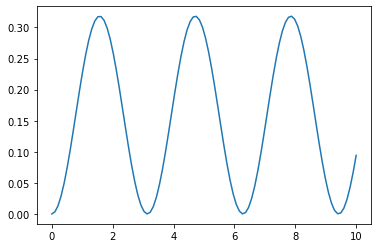

In [21]:
x_arr = np.linspace(0,10, 100)
plt.plot(x_arr, f(x_arr))

In [22]:
N = 1e5 # Npoints_total
points_x = []  # x of points_below
points_y = []  # y of points_below

point_above_x = []
point_above_y = []
for i in range(int(N)):
    x = (10 - 0) * rng.random() + 0.
    y = (0.33 - 0)*rng.random() + 0.
    if y <= f(x):
        points_x.append(x)
        points_y.append(y)
    else:
        point_above_x.append(x)
        point_above_y.append(y)

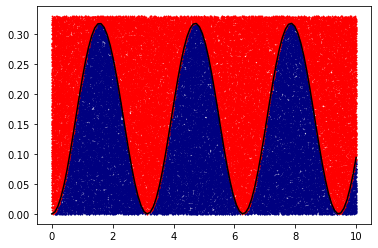

In [23]:
x_arr = np.linspace(0,10, 100)

plt.plot(points_x, points_y, color = 'navy', ls = '', marker = 'o', markersize = 0.8)
plt.plot(point_above_x, point_above_y, color = 'red', ls = '', marker = 'o', markersize = 0.8)
plt.plot(x_arr, f(x_arr), color = 'k', linewidth = 1.5)


In [25]:
N = np.array([1e0,1e1,1e2,1e3,1e4,1e5,1e6]) # Npoints_total
Int_f = np.zeros(len(N))
for i in range(len(N)):
    Int_f[i] = Integrate_MVM(f, a=0, b = 10, N=N[i])

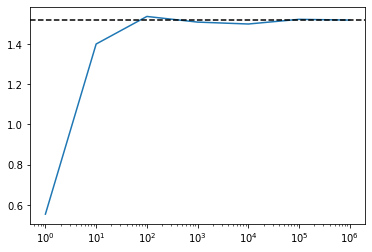

In [26]:
plt.plot(N, Int_f)

plt.axhline(1.5189, ls = '--', color = 'k')

plt.xscale('log')

# 4. Importance sampling &  Inverse Random Sampling

In [27]:
# Integrand function
def f(x): return x**(-0.5)/(np.exp(x)+1)

N = 100000 # 1e5
# integration domain
a = 0
b = 1

# w(x) = x^{-1/2}
# p(x) = w(x)/(\int_a^b w(x) dx)
# p(x) = x^{-1/2} / 2
# F(y) = \int_0^y p(x) dx
# then find the inverse of F, draw random points in y and then use the inverse of F to sample x
# F(y) = y^(1/2)
# x = y^2

y = rng.random(N) * (b-a) + a
x = np.array(y**2)

w = x**(-0.5)

fx = f(x)

I = 1/N * np.sum(fx/w) * 2

In [28]:
(I - 0.838933)*100

0.026314408730621075

In [29]:
def Integrate_IS(f, w, invG, I, a, b, N):
    ys = rng.random(N)
    xs = invG(ys*I)

    ws = w(xs)
    fs = f(xs)
    return np.sum(fs/ws) * I / N

In [30]:
def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return x**-0.5

def invG(x): # remember it has t be such that invG(0)=a
    return 0.25*x**2

Integrate_IS(f, w, invG, 2, a=0, b=1, N = 100000)

0.8380491958648144